In [88]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [89]:
STEP           = 1

In [ ]:
img = Image.open("german_shepherd.jpg")
w, h = img.size
# img = img.resize((w // 4, h // 4))                                                  #    Можно не делать .resize(())

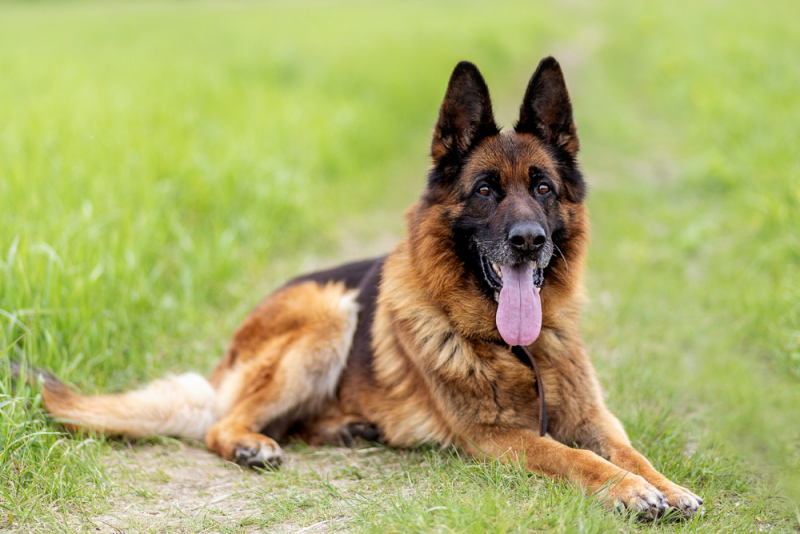

In [113]:
img

In [127]:
x_originial = np.array(img, dtype = np.float32)                                               #    Преобразование из PIL в numpy array
x_reconstructed = x_originial.copy()
colour_channels = x_reconstructed.shape[2]
r = 100
for colour_channel in range(0, colour_channels, STEP):
    # Выполнение условия теоремы
    min_size = np.min(x_copy[ : , : , colour_channel].shape)
    if r < 0 or r >= min_size:
        print("Неудачно выбрано число r")
        break

    U, S, V_T = np.linalg.svd(x_reconstructed[ : , : , colour_channel], full_matrices = False)     #    Разложение SVD по i-ому каналу
    x_reconstructed[ : , : , colour_channel] = U[ : , : r] @ np.diag(S[ : r]) @ V_T[ : r, : ]
    # fig = plt.figure(figsize = (15, 10))
    # plt.suptitle(str(colour_channel + 1) +  "th " + "colour channel")
    # plt.imshow(x_copy[ : , : , colour_channel])
    # plt.title("r = %s" % r)
    # plt.xticks([])
    # plt.yticks([])
    # plt.show()

x_reconstructed = np.clip(x_reconstructed, 0, 255)
x_reconstructed = np.asarray(x_reconstructed, dtype = np.uint8)
Image.fromarray(np.asarray(x_reconstructed, dtype = np.uint8)).save(f"german_sheperd_clipped (r = {r}).png")